In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
HORIZONTAL = -1
VERTICAL = 1

<class 'numpy.ndarray'>


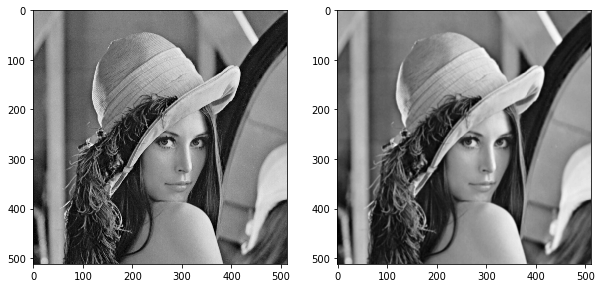

In [14]:
# Perform Gaussian Filter (denoises)
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE) # read in grayscale mode
dst = cv2.GaussianBlur(src=img,ksize=(5,5),sigmaX=1)

print(type(img))
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.subplot(122),plt.imshow(dst, cmap='gray')
plt.show()

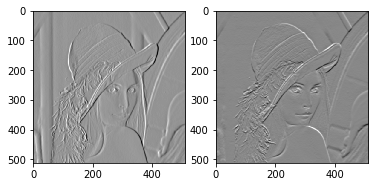

In [15]:
# Calculate Sobel Operator
ksize=5
Gx = cv2.Sobel(dst,cv2.CV_64F,1,0,ksize=ksize)
Gy = cv2.Sobel(dst,cv2.CV_64F,0,1,ksize=ksize)

plt.subplot(121),plt.imshow(Gx,cmap='gray')
plt.subplot(122),plt.imshow(Gy,cmap = 'gray')
plt.show()

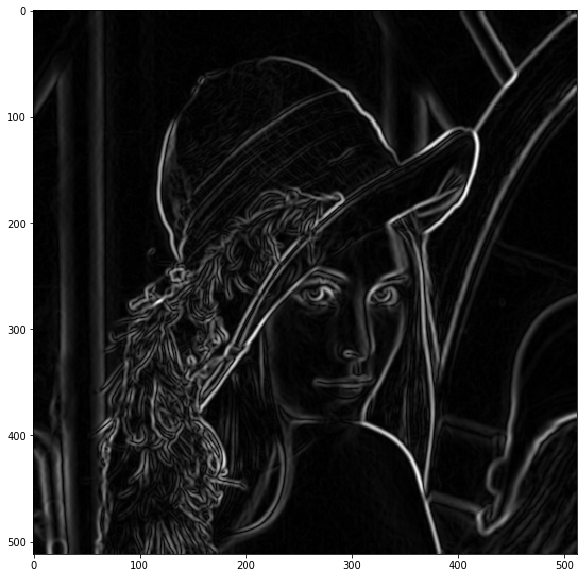

In [16]:
def gradient_map(Gx, Gy):
#     return abs(Gx) + abs(Gy)
    return np.sqrt(Gx**2 + Gy**2)

def edge_direction(Gx, Gy):
    return np.sign(np.abs(Gx) - np.abs(Gy)) # 1 = vertical edge, -1 = horizontal edge

G = gradient_map(Gx, Gy)
ED = edge_direction(Gx, Gy)
# [G, ED] = woofy(Gx, Gy)
thresh = 36
# G[G < thresh] = 0
# ED[G < thresh] = 0
# Gradient threshold?
plt.figure(figsize=(10,10))
plt.imshow(G, cmap='gray')
plt.show()

In [ ]:
anchThresh = 8
scanInterval = 4
show_image = True

anchors = []
def isAnchor(x, y, G, ED, anchorThresh): # x = row, y = col
    if ED[x][y] == HORIZONTAL: # horizontal, compare top and bottom (rows)
        if G[x][y]-G[x-1,y] >= anchorThresh and G[x][y]-G[x+1][y] >= anchorThresh:
            anchors.append([x,y])
    elif ED[x][y] == VERTICAL: # vertical, compare with left and right (cols)
        if G[x][y]-G[x][y-1] >= anchorThresh and G[x][y]-G[x][y+1] >= anchorThresh:
            anchors.append([x,y])
    
def anchorScan(G, ED, anchorThresh, interval):
    for i in range(1,G.shape[0]-1,interval):
        for j in range(1,G.shape[1]-1,interval):
            isAnchor(i, j, G, ED, anchorThresh)

anchorScan(G, ED, anchThresh, scanInterval)
x = []
y = []
for [x_, y_] in anchors:
    x.append(y_)
    y.append(x_)

plt.figure(figsize=(10,10))
if show_image:
    plt.scatter(x, y, marker='2', color='w')
    plt.imshow(G, cmap='gray')
else:
    plt.scatter(x, y, marker='2', color='k')

plt.show()

In [ ]:
E = np.zeros(np.shape(G), dtype = bool)
def proceedLeft(x, y, G, D, E):
    while G[x][y] > 0 and not E[x][y] and D[x][y] == HORIZONTAL:
        E[x][y] = True
        if y > 0:
            y = y - 1
            top = G[x-1][y]
            mid = G[x][y]
            bot = G[x+1][y]
            if top > mid and top > bot:
                x = x - 1
            elif bot > mid and bot > top:
                x = x + 1
        else:
            return
    
    proceed(x, y, G, D, E)
    
def proceedRight(x, y, G, D, E):
    while G[x][y] > 0 and not E[x][y] and D[x][y] == HORIZONTAL:
        E[x][y] = True
        if y < len(G[x]) - 1:
            y = y + 1
            top = G[x-1][y]
            mid = G[x][y]
            bot = G[x+1][y]
            if top > mid and top > bot:
                x = x - 1
            elif bot > mid and bot > top:
                x = x + 1
        else:
            return
    
    proceed(x, y, G, D, E)

def proceedUp(x, y, G, D, E):
    while G[x][y] > 0 and not E[x][y] and D[x][y] == VERTICAL:
        E[x][y] = True
        if x > 0:
            x = x - 1
            left = G[x][y-1]
            mid = G[x][y]
            right = G[x][y+1]
            if left > mid and left > right:
                y = y - 1
            elif right > mid and right > left:
                y = y + 1
        else:
            return
    
    proceed(x, y, G, D, E)

def proceedDown(x, y, G, D, E):
    while G[x][y] > 0 and not E[x][y] and D[x][y] == VERTICAL:
        E[x][y] = True
        if x < len(G) - 1:
            x = x + 1
            left = G[x][y-1]
            mid = G[x][y]
            right = G[x][y+1]
            if left > mid and left > right:
                y = y - 1
            elif right > mid and right > left:
                y = y + 1
        else:
            return
    
    proceed(x, y, G, D, E)

    
def proceed(x, y, G, D, E):
    if G[x][y] == 0 or E[x][y]:
        return
    if D[x][y] == HORIZONTAL:
        proceedLeft(x, y, G, D, E)
        proceedRight(x, y, G, D, E)
    elif D[x][y] == VERTICAL:
        proceedDown(x, y, G, D, E)
        proceedUp(x, y, G, D, E)

for [x, y] in anchors:
    if not E[x][y]:
        proceed(x, y, G, ED, E)


x = []
y = []
for i, val in enumerate(E):
    for j, x_ in enumerate(val):
        if x_ == 1:
            x.append(j)
            y.append(i)

show_image = True
plt.figure(figsize=(10,10))
if show_image:
    plt.scatter(x, y, marker='2', color='w')
    plt.imshow(G, cmap='gray')
else:
    plt.scatter(x, y, marker='2', color='k')

plt.show()
plt.savefig('lenna_done.png')

In [ ]:
np.sign(12)

In [50]:
def perp_dist(point, start, end):
    print(point, type(start), end)
    if np.all(np.equal(start, end)):
        return np.linalg.norm(point - start)

    return np.divide(
            np.abs(np.linalg.norm(np.cross(end - start, start - point))),
            np.linalg.norm(end - start))
# douglas peucker

def dp(points, e):
    dmax = 0
    index = 0
    end = len(points)
    for i in range(1, end - 1):
        d = perp_dist(points[i], points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d
    
    res = []
    if dmax > e:
        left = dp(points[:index + 1], e)
        right = dp(points[index: end], e)
        res.extend(left[:-1])
        res.extend(right)
        return res
    else:
        return [points[0], points[-1]]

arr = np.array([1, 1, 2, 4, 3, 3, 4, 4]).reshape(4, 2)
dep = dp(arr, 0.5)
print(arr)
print(dep)
plt.show()

[2 4] <class 'numpy.ndarray'> [4 4]
[3 3] <class 'numpy.ndarray'> [4 4]
[3 3] <class 'numpy.ndarray'> [4 4]
[[1 1]
 [2 4]
 [3 3]
 [4 4]]
[array([1, 1]), array([2, 4]), array([3, 3]), array([4, 4])]
